# EE-411, HomeWork 3 : Neural networks
### Yassin Alnuaimee 326279  EL-MA1

## 1 Backpropagation with logistic loss

### 1)

In [1]:
import numpy as np

In [2]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1.0 / (1 + np.exp(-t))

In [3]:
def predict(X,W):
  W1 = W['w_1']
  W2 = W['w_2']

  z1 = W1.T @ X.T
  x1 = sigmoid(z1)
  z2 = W2.T @ x1
  y_hat = sigmoid(z2)

  return z1, z2, y_hat

### 2)

The average average logistic loss is defined as
 $\frac{1}{N} \left( \sum_{i=1}^N -y_i \log(σ(w^{(2)}_i x_i^{(1)})) + (1-y_i) \log(1 - σ(w^{(2)}_i x_i^{(1)})) \right) = \frac{1}{N} \left( \sum_{i=1}^N -y_i \log(\hat{y}) + (1-y_i) \log(1 - \hat{y}) \right)$.

In [4]:
def logistic_loss(y,y_hat):
  cost = -y*np.log(y_hat) - (np.ones(np.size(y))-y)*np.log(1-y_hat)
  return np.mean(cost)

print(logistic_loss(0,0))

nan


<ipython-input-4-d59029c01d84>:2: RuntimeWarning: divide by zero encountered in log
  cost = -y*np.log(y_hat) - (np.ones(np.size(y))-y)*np.log(1-y_hat)
<ipython-input-4-d59029c01d84>:2: RuntimeWarning: invalid value encountered in double_scalars
  cost = -y*np.log(y_hat) - (np.ones(np.size(y))-y)*np.log(1-y_hat)


We see that this formula gves an error for $\hat{y}$ and $y=0$

### 3)

 Therefore, we need to find a more stable version that would accept really small numbers for prediction. The logistic loss is given by
 $$\frac{1}{N} \left( \sum_{i=1}^N -y_i \log \left(\frac{1}{1+e^{-w^{(2)}_i x_i^{(1)}}} \right) + (1-y_i) \log \left(1 - \frac{1}{1+e^{-w^{(2)}_i x_i^{(1)}}}) \right) \right)$$
 $$= \frac{1}{N} \left( \sum_{i=1}^N -y_i \log \left((1+e^{-w^{(2)}_i x_i^{(1)}})^{-1} \right) + (1-y_i) \log \left((1+e^{w^{(2)}_i x_i^{(1)}})^{-1}  \right) \right)$$



With $z^{(2)} = w^{(2)}_i x_i^{(1)}$, we get

$$ L(y,z^{(2)}) =  \frac{1}{N} \left( \sum_{i=1}^N -y_i \log \left((1+e^{-z^{(2)}})^{-1} \right) + (1-y_i) \log \left((1+e^{z^{(2)}})^{-1}  \right) \right)  $$
$$= \frac{1}{N} \left( \sum_{i=1}^N y_i \log \left((1+e^{-z^{(2)}}) \right) - (1-y_i) \log \left((1+e^{z^{(2)}})  \right) \right) $$
$$= \frac{1}{N} \left( \sum_{i=1}^N y_i \log \left((e^0+e^{-z^{(2)}}) \right) - (1-y_i) \log \left((e^0+e^{z^{(2)}})  \right) \right)$$
We now have a sum of exponentials and can use the logaddexp function of numpy to have a more stable version of the average logistic loss.

In [5]:
def stable_logistic_loss(y,z_2):
  cost = y * np.logaddexp(0,-z_2) - (y - np.ones(np.size(y))) * np.logaddexp(0,z_2)
  return np.mean(cost)

print(stable_logistic_loss(0, -10e10))

0.0


In this revised version of the logistic formula, we observe that the output aligns well with our expectations, demonstrating greater stability. Specifically, when $z^{(2)} = -10^{10}$, this implies $\hat{y} = \sigma(z^{(2)})$ approaches zero. Consequently, if the actual value is set to 0, it indicates an accurate prediction, warranting a minimal loss to acknowledge this accuracy. This scenario is indeed reflected here, as we observe a loss value of 0. The 'logaddexp' function in NumPy proves extremely beneficial, particularly in handling the summation of very small exponentials within a logarithmic context. This function efficiently prevents overflow issues, which are common in standard NumPy operations when dealing with extremely small values that exceed the typical range of floating-point numbers.

### 4)

The Loss function is defined as: $$ L = y \log(1+ e^{-z_2}) - (y-1) \log(1 + e^{z_2}) $$ with $z_2 = W_2^T x_1$ and $x_1 = σ(W_1^T x_0)$. We can even obatin a direct dependency between $z_2$ and $W_1 $ such that $z_2 = W_2^T σ(W_1^T x_0)$).

Thederivative with respect to $W_2$ is :

$$ \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial (z_2/x_1)} = \frac{\partial L}{\partial z_2} x_1$$

Thus we now need to compute the $\frac{\partial L}{\partial z_2}$
$$\frac{\partial L}{\partial z_2} = -y \cdot \frac{1}{1+e^{z_2}} + (1-y) \cdot \frac{1}{1+e^{-z_2}} = -y \cdot \sigma(-z_2) + (1-y) \cdot \sigma(z_2)$$

We therefore get $$ \frac{\partial L}{\partial W_2} = (-y \cdot \sigma(-z_2) + (1-y) \cdot \sigma(z_2))x_1 $$

Now let's look at $ \frac{\partial L}{\partial W_1}$. Using the chain rule, we have that :
$$ \frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_1} = \frac{\partial L}{\partial z_2} W_2^T σ'(W_1^T x_0) x_0$$

$$ \frac{\partial L}{\partial W_1} = \left( -y \cdot \sigma(-z_2) + (1-y) \cdot \sigma(z_2) \right) W_2^T σ'(z_1) x_0$$
The derivative of the sigmoid function is $σ'(t) = \sigma(t) (1-\sigma(t))$. Hence we get

$$ \frac{\partial L}{\partial W_1} = \left( -y \cdot \sigma(-z_2) + (1-y) \cdot \sigma(z_2) \right) W_2^T \sigma(z_1) (1-\sigma(z_1)) x_0 $$

Therefore, we have the following gradient :
$$ \frac{\partial L}{\partial W_1} = \left( -y \cdot \sigma(-z_2) + (1-y) \cdot \sigma(z_2) \right) W_2^T \sigma(z_1) (1-\sigma(z_1)) x_0 $$
$$ \frac{\partial L}{\partial W_2} = (-y \cdot \sigma(-z_2) + (1-y) \cdot \sigma(z_2))x_1  $$


### 5)

The gradient function returns the partial derivatives of the loss with respect to $w^{(1)}$ and $w^{(2)}$. Let's try the function with some random inputs and see if it works correctly.

In [6]:
def gradient(X,y,W):


  X = X[:,np.newaxis]
  W['w_2'] = W['w_2'][:,np.newaxis]
  x1 = sigmoid(W['w_1'].T @ X)
  z1 = W['w_1'].T@X
  z2 = W['w_2'].T@x1


  dl_dw2 = x1/(1+np.exp(z2)) * (-y -y*np.exp(z2) + np.exp(z2))

  dl_dw1 = ((-y * sigmoid(-z2) + (np.ones((np.shape(y)))-y)*sigmoid(z2)) * W['w_2'].T @sigmoid(z1)*(np.ones((np.shape(z1))) - sigmoid(z1))@X.T).T

  return {
        "dl_dw_1": dl_dw1,
        "dl_dw_2": dl_dw2
    }


In [7]:
X = np.array([0.01, 0.02, 0.03, 0.04])
W = {
    "w_1": np.ones((4, 5)),
    "w_2": np.ones(5)
}
y = 1

print(gradient(X,y,W))

{'dl_dw_1': array([[-0.00084231, -0.00084231, -0.00084231, -0.00084231, -0.00084231],
       [-0.00168462, -0.00168462, -0.00168462, -0.00168462, -0.00168462],
       [-0.00252692, -0.00252692, -0.00252692, -0.00252692, -0.00252692],
       [-0.00336923, -0.00336923, -0.00336923, -0.00336923, -0.00336923]]), 'dl_dw_2': array([[-0.03546405],
       [-0.03546405],
       [-0.03546405],
       [-0.03546405],
       [-0.03546405]])}


The function generates output vectors matching the dimensions of the input vectors, suggesting a high probability that it accurately calculates the desired gradients.

## 2 classifying KMNSIT using neural networks

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader

### 1)

In [9]:
# The data are given as PIL images. We need to convert our data to a type
# that is readable by a Neural Network. Thus, we use the ToTensor() "transform"
transform = T.Compose([T.ToTensor()])

# load the train dataset

train_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

# load the test dataset
test_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

print(train_dataset)

# Split the dataset into 50k-10k samples for training-validation.
from torch.utils.data import random_split
train_dataset,  valid_dataset = random_split(
    train_dataset,
    lengths=[50000, 10000],
    generator=torch.Generator().manual_seed(42) #use a generator to insure reproducibilty
)

# what is the type of the "new" training dataset?
print(train_dataset)

100%|██████████| 18165135/18165135 [00:10<00:00, 1718035.27it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 340081.82it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:01<00:00, 1548042.66it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 21648020.65it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [10]:
# define the hyperparameters
BATCH_SIZE = 1024
TEST_BATCH_SIZE = 1024

# find out which device is available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [11]:
print(DEVICE)

cuda


In [12]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2)

valid_dataloader = DataLoader(
    dataset=valid_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/HW3')

In [15]:
from training_utils import train_epoch, fit, predict, visualize_images, plot_loss

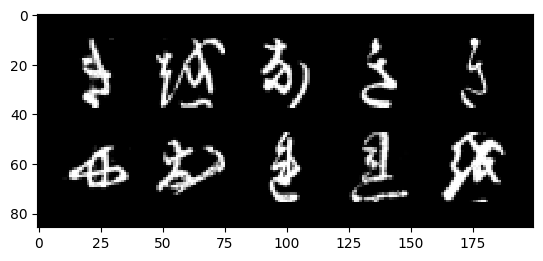

In [16]:
visualize_images(train_dataloader)

### 2)

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
class Net(nn.Module):
    def __init__(self):

        super().__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        # we also define the non-linearity
        self.relu = nn.ReLU()



    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # ***************************************************
        # INSERT YOUR CODE HERE
        # You should (a) transform the a size that is readable
        # by the MLP and (b) pass the the input x successively
        # through the layers.
        # ***************************************************
        # transform the image to a vector
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)

        # pass the vectored image through the layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

In [19]:
# initialize the model
model = Net()

# move model to device
model = model.to(DEVICE)

# define the optimizer
# Hint: https://pytorch.org/docs/stable/optim.html
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [20]:
from typing import Optional

def fit(
    model: nn.Module,
    train_dataloader: DataLoader,
    optimizer: torch.optim.Optimizer,
    epochs: int,
    device: torch.device,
    valid_dataloader: Optional[DataLoader]=None):
    '''
    the fit method simply calls the train_epoch() method for a
    specified number of epochs.
    '''

    # keep track of the losses in order to visualize them later
    # Train for numerous epochs:
    train_losses = []
    valid_losses = []
    valid_accs = []
    for epoch in range(epochs):
        train_loss = train_epoch(
            model=model,
            train_dataloader=train_dataloader,
            optimizer=optimizer,
            device=device
        )
        train_losses.append(train_loss)

        if valid_dataloader is not None:
            valid_loss, valid_acc = predict(model, valid_dataloader, device, verbose=False)
            valid_losses.append(valid_loss)
            valid_accs.append(valid_acc)

        if valid_dataloader is None:
            print(f"Epoch {epoch}: Train Loss={train_loss:.4f}")
        else:
            print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Validation Loss={valid_loss:.4f}, Validation acc={valid_acc:.4f}")

    return train_losses, valid_losses, valid_accs

In [21]:
train_losses, valid_losses, valid_accs = fit(
    model=model,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

Epoch 0: Train Loss=2.3022, Validation Loss=2.2964, Validation acc=11.7100
Epoch 1: Train Loss=2.2907, Validation Loss=2.2843, Validation acc=18.6200
Epoch 2: Train Loss=2.2773, Validation Loss=2.2694, Validation acc=28.3100
Epoch 3: Train Loss=2.2600, Validation Loss=2.2499, Validation acc=33.1800
Epoch 4: Train Loss=2.2371, Validation Loss=2.2237, Validation acc=32.6800
Epoch 5: Train Loss=2.2064, Validation Loss=2.1886, Validation acc=32.5600
Epoch 6: Train Loss=2.1653, Validation Loss=2.1418, Validation acc=34.4900
Epoch 7: Train Loss=2.1116, Validation Loss=2.0817, Validation acc=37.9600
Epoch 8: Train Loss=2.0444, Validation Loss=2.0085, Validation acc=41.9900
Epoch 9: Train Loss=1.9657, Validation Loss=1.9257, Validation acc=46.0000
Epoch 10: Train Loss=1.8803, Validation Loss=1.8386, Validation acc=51.3300
Epoch 11: Train Loss=1.7924, Validation Loss=1.7507, Validation acc=55.9100
Epoch 12: Train Loss=1.7047, Validation Loss=1.6630, Validation acc=59.4300
Epoch 13: Train Loss=1

In [22]:
predict(model=model, test_dataloader=test_dataloader, device=DEVICE)

Test set: Avg. loss: 1.5297, Accuracy: 5437/10000 (54%)


(1.5296988647460938, tensor(54.3700, device='cuda:0'))

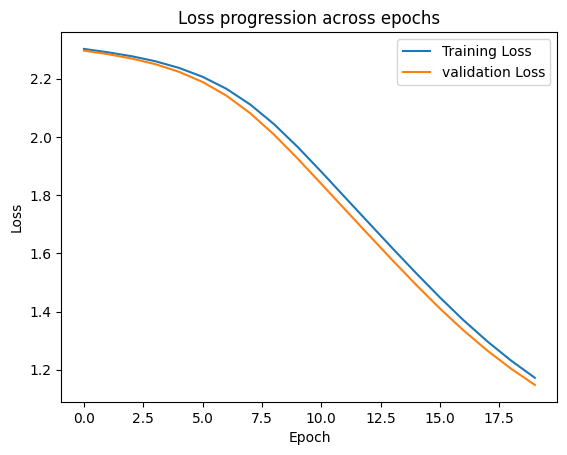

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=2.2543, Validation Loss=2.1502, Validation acc=43.5300
Epoch 1: Train Loss=1.8198, Validation Loss=1.3929, Validation acc=62.8000
Epoch 2: Train Loss=1.1198, Validation Loss=0.9277, Validation acc=72.3300
Epoch 3: Train Loss=0.8254, Validation Loss=0.7601, Validation acc=77.1300
Epoch 4: Train Loss=0.7050, Validation Loss=0.6775, Validation acc=79.5700
Epoch 5: Train Loss=0.6334, Validation Loss=0.6231, Validation acc=81.4800
Epoch 6: Train Loss=0.5845, Validation Loss=0.5865, Validation acc=82.3900
Epoch 7: Train Loss=0.5481, Validation Loss=0.5572, Validation acc=83.2700
Epoch 8: Train Loss=0.5187, Validation Loss=0.5323, Validation acc=84.0900
Epoch 9: Train Loss=0.4929, Validation Loss=0.5107, Validation acc=84.7400
Epoch 10: Train Loss=0.4693, Validation Loss=0.4907, Validation acc=85.5000
Epoch 11: Train Loss=0.4479, Validation Loss=0.4726, Validation acc=85.9600
Epoch 12: Train Loss=0.4288, Validation Loss=0.4576, Validation acc=86.4200
Epoch 13: Train Loss=0

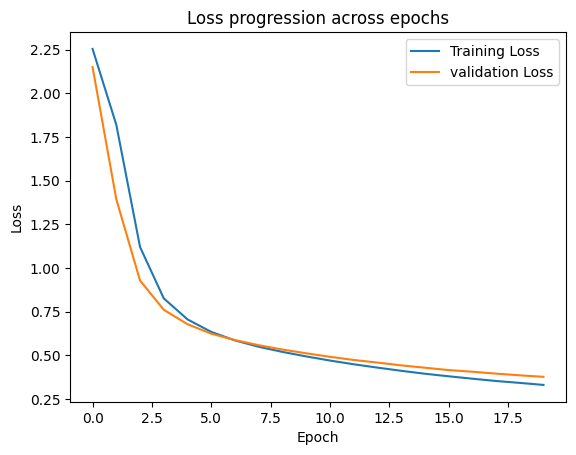

In [24]:
# initialize the model
MLP_SGD_nest= Net().to(DEVICE)

optimizer = optim.SGD(MLP_SGD_nest.parameters(), lr=0.01, momentum=0.9, nesterov=True)

train_losses, valid_losses, valid_accs = fit(
    model=MLP_SGD_nest,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=MLP_SGD_nest, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=0.6742, Validation Loss=0.3589, Validation acc=89.2100
Epoch 1: Train Loss=0.2636, Validation Loss=0.2644, Validation acc=91.9700
Epoch 2: Train Loss=0.1838, Validation Loss=0.2289, Validation acc=93.2500
Epoch 3: Train Loss=0.1343, Validation Loss=0.2220, Validation acc=93.6300
Epoch 4: Train Loss=0.1106, Validation Loss=0.2061, Validation acc=94.0700
Epoch 5: Train Loss=0.0840, Validation Loss=0.2082, Validation acc=94.3900
Epoch 6: Train Loss=0.0685, Validation Loss=0.2239, Validation acc=94.0500
Epoch 7: Train Loss=0.0579, Validation Loss=0.2195, Validation acc=94.4700
Epoch 8: Train Loss=0.0496, Validation Loss=0.2476, Validation acc=94.1500
Epoch 9: Train Loss=0.0416, Validation Loss=0.2584, Validation acc=94.6700
Epoch 10: Train Loss=0.0307, Validation Loss=0.2611, Validation acc=94.6600
Epoch 11: Train Loss=0.0270, Validation Loss=0.2901, Validation acc=94.4800
Epoch 12: Train Loss=0.0263, Validation Loss=0.2972, Validation acc=94.3300
Epoch 13: Train Loss=0

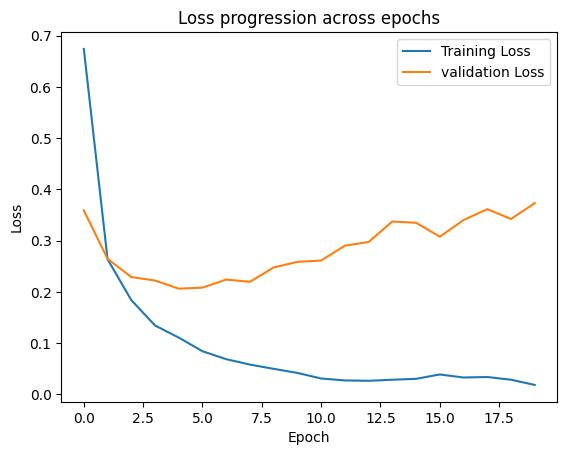

In [25]:
MLP_Adam= Net().to(DEVICE)

optimizer = optim.Adam(MLP_Adam.parameters(), lr=0.01)

train_losses, valid_losses, valid_accs = fit(
    model=MLP_Adam,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=MLP_Adam, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=2785.4675, Validation Loss=2.3241, Validation acc=10.1300
Epoch 1: Train Loss=2.3078, Validation Loss=2.3069, Validation acc=10.4200
Epoch 2: Train Loss=2.3068, Validation Loss=2.3109, Validation acc=9.7800
Epoch 3: Train Loss=2.3092, Validation Loss=2.3106, Validation acc=10.0300
Epoch 4: Train Loss=2.3083, Validation Loss=2.3056, Validation acc=10.4200
Epoch 5: Train Loss=2.3118, Validation Loss=2.3157, Validation acc=9.7800
Epoch 6: Train Loss=2.3109, Validation Loss=2.3088, Validation acc=9.7800
Epoch 7: Train Loss=2.3100, Validation Loss=2.3128, Validation acc=10.4200
Epoch 8: Train Loss=2.3095, Validation Loss=2.3099, Validation acc=9.7800
Epoch 9: Train Loss=2.3128, Validation Loss=2.3119, Validation acc=9.7800
Epoch 10: Train Loss=2.3114, Validation Loss=2.3063, Validation acc=10.3600
Epoch 11: Train Loss=2.3116, Validation Loss=2.3102, Validation acc=10.1300
Epoch 12: Train Loss=2.3096, Validation Loss=2.3122, Validation acc=9.7800
Epoch 13: Train Loss=2.31

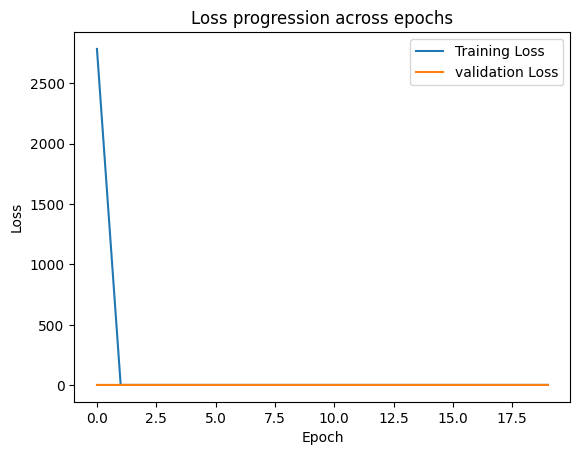

In [26]:
optimizer = optim.Adam(model.parameters(), lr= 1)

train_losses, valid_losses, valid_accs = fit(
    model=model,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=model, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

In summary, the training of a two-hidden-layer MLP on the KMNIST dataset with various optimizers yielded distinct outcomes. SGD with a learning rate of 0.01 showed steady but slow progress, achieving a modest test accuracy of 54%, indicating potential underfitting. In contrast, the incorporation of momentum in SGD (lr=0.01, momentum=0.9, nesterov=True) significantly enhanced performance, rapidly decreasing loss and boosting test accuracy to 79%, demonstrating the effectiveness of momentum in overcoming local minima. Adam optimizer with a learning rate of 0.01 initially performed well but exhibited signs of overfitting, as indicated by high initial validation accuracy and increasing validation loss, culminating in an 88% test accuracy. However, when the learning rate was increased to 1 in the Adam optimizer, the model's performance drastically deteriorated, with the test accuracy plummeting to a mere 10%. This drastic decline was a clear consequence of an excessively high learning rate, which hindered the model's ability to converge to an optimal solution. These results underscore the critical impact of optimizer choice and hyperparameter tuning in neural network training, particularly in balancing learning efficiency and model generalization.

### 3)

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # We use a Sequential, i.e. the inputs passes through each of
        # the modules below, one-by-one
        self.conv = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # fully connected layer, output 10 classes
        self.out = nn.Linear(64*3*3, 10)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1) #reshape the tensor
        x = self.out(x)
        return x


In [28]:
# initialize model
cnn = CNN().to(DEVICE)

# define the optimizer
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=cnn,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=cnn, test_dataloader=test_dataloader, device=DEVICE)

Epoch 0: Train Loss=2.3034, Validation Loss=2.3023, Validation acc=9.7800
Epoch 1: Train Loss=2.3001, Validation Loss=2.2989, Validation acc=15.6900
Epoch 2: Train Loss=2.2965, Validation Loss=2.2949, Validation acc=23.5800
Epoch 3: Train Loss=2.2920, Validation Loss=2.2899, Validation acc=25.9200
Epoch 4: Train Loss=2.2862, Validation Loss=2.2832, Validation acc=28.4300
Epoch 5: Train Loss=2.2779, Validation Loss=2.2732, Validation acc=31.9700
Epoch 6: Train Loss=2.2650, Validation Loss=2.2568, Validation acc=36.7800
Epoch 7: Train Loss=2.2428, Validation Loss=2.2273, Validation acc=39.7000
Epoch 8: Train Loss=2.1999, Validation Loss=2.1660, Validation acc=42.2900
Epoch 9: Train Loss=2.1024, Validation Loss=2.0173, Validation acc=47.2900
Epoch 10: Train Loss=1.8703, Validation Loss=1.6950, Validation acc=58.1700
Epoch 11: Train Loss=1.5156, Validation Loss=1.3660, Validation acc=62.9400
Epoch 12: Train Loss=1.2517, Validation Loss=1.1687, Validation acc=65.6000
Epoch 13: Train Loss=1.

(1.1509310302734375, tensor(62.4900, device='cuda:0'))

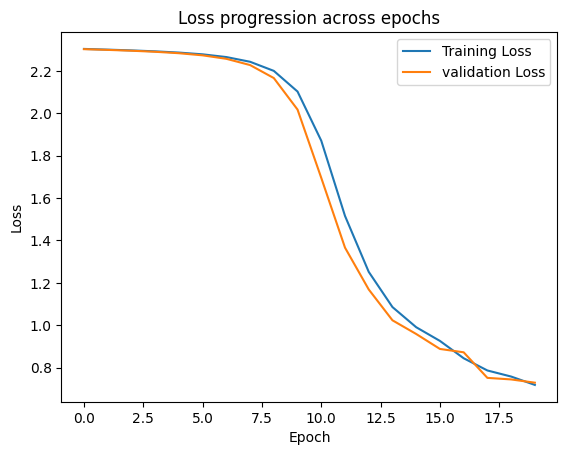

In [29]:
plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=2.2903, Validation Loss=2.2629, Validation acc=24.2300
Epoch 1: Train Loss=1.8713, Validation Loss=1.2327, Validation acc=60.2300
Epoch 2: Train Loss=0.8364, Validation Loss=0.6385, Validation acc=80.3000
Epoch 3: Train Loss=0.5624, Validation Loss=0.6135, Validation acc=81.4600
Epoch 4: Train Loss=0.4347, Validation Loss=0.4003, Validation acc=88.0300
Epoch 5: Train Loss=0.3715, Validation Loss=0.3662, Validation acc=88.6200
Epoch 6: Train Loss=0.3146, Validation Loss=0.3222, Validation acc=89.9600
Epoch 7: Train Loss=0.2930, Validation Loss=0.2762, Validation acc=91.6200
Epoch 8: Train Loss=0.2493, Validation Loss=0.2628, Validation acc=91.9200
Epoch 9: Train Loss=0.2329, Validation Loss=0.2459, Validation acc=92.7500
Epoch 10: Train Loss=0.2085, Validation Loss=0.2328, Validation acc=93.0700
Epoch 11: Train Loss=0.1967, Validation Loss=0.2244, Validation acc=93.0800
Epoch 12: Train Loss=0.1798, Validation Loss=0.2119, Validation acc=93.6700
Epoch 13: Train Loss=0

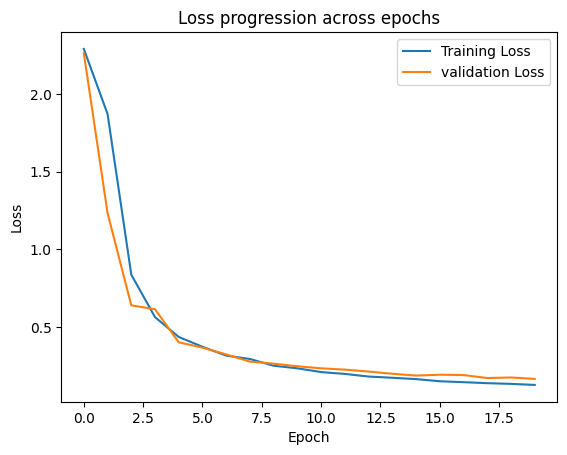

In [30]:
# initialize model
CNN_SGD_nest = CNN().to(DEVICE)

# define the optimizer
optimizer = optim.SGD(CNN_SGD_nest.parameters(), lr=0.01,momentum=0.9, nesterov=True)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=CNN_SGD_nest,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=CNN_SGD_nest, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=0.8451, Validation Loss=0.3069, Validation acc=90.6000
Epoch 1: Train Loss=0.2109, Validation Loss=0.1750, Validation acc=94.8600
Epoch 2: Train Loss=0.1301, Validation Loss=0.1453, Validation acc=95.8900
Epoch 3: Train Loss=0.0921, Validation Loss=0.1161, Validation acc=96.6100
Epoch 4: Train Loss=0.0748, Validation Loss=0.1129, Validation acc=96.8000
Epoch 5: Train Loss=0.0623, Validation Loss=0.1034, Validation acc=97.0600
Epoch 6: Train Loss=0.0491, Validation Loss=0.0978, Validation acc=97.2700
Epoch 7: Train Loss=0.0438, Validation Loss=0.0924, Validation acc=97.5100
Epoch 8: Train Loss=0.0340, Validation Loss=0.1097, Validation acc=97.1500
Epoch 9: Train Loss=0.0323, Validation Loss=0.1070, Validation acc=97.3700
Epoch 10: Train Loss=0.0237, Validation Loss=0.1200, Validation acc=97.1000
Epoch 11: Train Loss=0.0236, Validation Loss=0.1196, Validation acc=97.4800
Epoch 12: Train Loss=0.0235, Validation Loss=0.1021, Validation acc=97.5400
Epoch 13: Train Loss=0

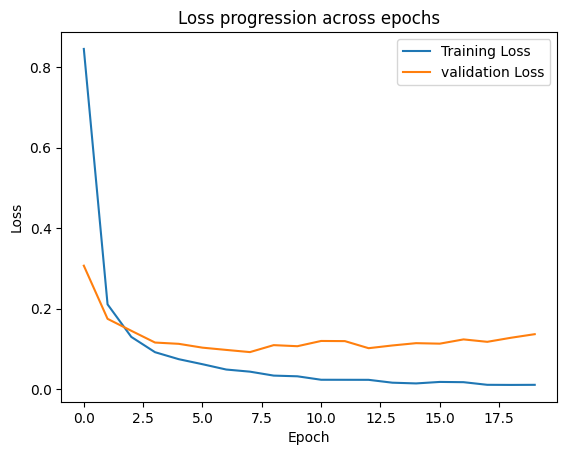

In [31]:
# initialize model
CNN_Adam = CNN().to(DEVICE)

# define the optimizer
optimizer = optim.Adam(CNN_Adam.parameters(), lr=0.01)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=CNN_Adam,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=CNN_Adam, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=10620.2871, Validation Loss=2.3653, Validation acc=10.1300
Epoch 1: Train Loss=2.3157, Validation Loss=2.3060, Validation acc=9.7000
Epoch 2: Train Loss=2.3045, Validation Loss=2.3078, Validation acc=9.7000
Epoch 3: Train Loss=2.3066, Validation Loss=2.3085, Validation acc=10.0300
Epoch 4: Train Loss=2.3066, Validation Loss=2.3060, Validation acc=10.0300
Epoch 5: Train Loss=2.3059, Validation Loss=2.3085, Validation acc=10.0300
Epoch 6: Train Loss=2.3062, Validation Loss=2.3072, Validation acc=10.1300
Epoch 7: Train Loss=2.3067, Validation Loss=2.3050, Validation acc=10.0300
Epoch 8: Train Loss=2.3082, Validation Loss=2.3060, Validation acc=10.4200
Epoch 9: Train Loss=2.3078, Validation Loss=2.3064, Validation acc=9.6800
Epoch 10: Train Loss=2.3088, Validation Loss=2.3119, Validation acc=10.3600
Epoch 11: Train Loss=2.3080, Validation Loss=2.3105, Validation acc=10.1300
Epoch 12: Train Loss=2.3091, Validation Loss=2.3054, Validation acc=9.6800
Epoch 13: Train Loss=2

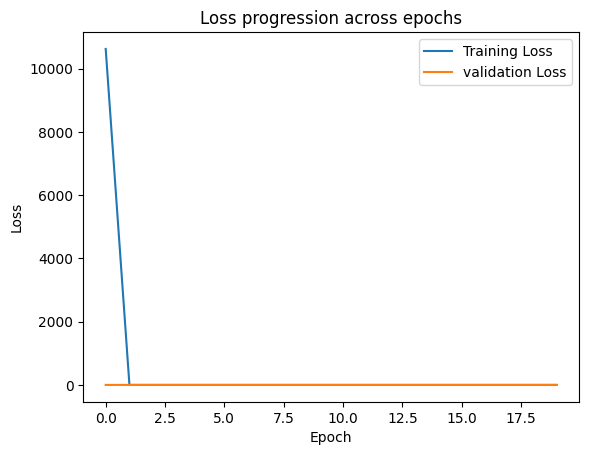

In [32]:
# initialize model
cnn = CNN().to(DEVICE)

# define the optimizer
optimizer = optim.Adam(cnn.parameters(), lr=1)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=cnn,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=cnn, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

In the training of a CNN with three convolutional layers on the KMNIST dataset, the results across various optimizers revealed notable improvements compared to the earlier MLP model. When using SGD (lr=0.01), the CNN demonstrated a gradual but consistent improvement in learning, achieving a test accuracy of 62%, surpassing the MLP's 54%. This enhancement underscores the effectiveness of convolutional layers in image recognition tasks. The addition of momentum to SGD (lr=0.01, momentum=0.9, nesterov=True) significantly boosted performance in the CNN, reaching a test accuracy of 89%, compared to 79% in the MLP, highlighting the benefits of momentum in accelerating learning, especially in CNN architectures. With Adam (lr=0.01), the CNN achieved a remarkable test accuracy of 94%, indicating superior learning dynamics and efficiency, likely due to Adam's adaptive learning capabilities. This result was a significant step up from the MLP's 88% accuracy. However, in the scenario with Adam at a high learning rate (lr=1), both the CNN and MLP models performed poorly, with a mere 10% accuracy, emphasizing the critical role of an appropriate learning rate in neural network training. Overall, these results not only demonstrate the superiority of CNNs over MLPs for image-based tasks but also highlight the influence of optimizer choice and learning rate settings on model performance and generalization.

### 4)

In [33]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

MLP_SGD_nest_parameters = count_parameters(MLP_SGD_nest)
MLP_Adam_parameters= count_parameters(MLP_Adam)
CNN_SGD_nest_parameters = count_parameters(CNN_SGD_nest)
CNN_Adam_parameters = count_parameters(CNN_Adam)

print(f"Total number of parameters in MLP SGD momentum model: {MLP_SGD_nest_parameters}")
print(f"Total number of parameters in MLP Adam model: {MLP_Adam_parameters}")
print(f"Total number of parameters in CNN SGD momentum model: {CNN_SGD_nest_parameters}")
print(f"Total number of parameters in CNN Adam model: {CNN_Adam_parameters}")

Total number of parameters in MLP SGD momentum model: 89610
Total number of parameters in MLP Adam model: 89610
Total number of parameters in CNN SGD momentum model: 29066
Total number of parameters in CNN Adam model: 29066


From the results, there are a few key observations and deductions we can make:

1. **Same Number of Parameters for Different Optimizers**: Both the MLP (Multi-Layer Perceptron) and CNN (Convolutional Neural Network) models have the same number of parameters regardless of the optimizer used (SGD with momentum or Adam). This is expected because the number of parameters in a model is determined by its architecture (number and size of layers, etc.) and not by the optimization algorithm used during training.

2. **MLP vs. CNN Parameter Count**: The MLP model has significantly more parameters (84,060) compared to the CNN model (29,066). This difference is mainly due to the nature of these models:
   - MLPs are fully connected networks, meaning each neuron in one layer is connected to all neurons in the next layer. This typically results in a higher number of parameters, especially for layers with many neurons.
   - CNNs, on the other hand, use shared weights in their convolutional layers, which significantly reduces the number of parameters. This makes CNNs particularly efficient for tasks like image processing where input data have high dimensionality.

3. **Implications for Training and Generalization**:
   - **Training Time**: Models with more parameters (like MLP) generally take longer to train, as there are more weights to update during each backpropagation step.
   - **Generalization Ability**: Models with fewer parameters (like CNN) are often less prone to overfitting, especially when dealing with limited training data. They are typically more generalizable to new, unseen data.
   - **Memory Usage**: Fewer parameters also mean lower memory requirements, making the model more suitable for deployment in environments with limited computational resources.

4. **Optimizer Choice**: While the choice of optimizer doesn’t affect the number of parameters, it can significantly impact the training process. SGD with momentum and Adam are different in how they update model weights:
   - **SGD with Momentum**: This optimizer considers the past gradients to smooth the optimization landscape. It’s simpler but might require more tuning of hyperparameters like learning rate.
   - **Adam**: An adaptive learning rate optimizer that computes individual learning rates for different parameters. It’s more sophisticated and often converges faster, but sometimes it might lead to overfitting if not properly regularized.

In summary, these results highlight differences in architecture between MLPs and CNNs and underscore the fact that the choice of optimizer affects training dynamics, not the model's structural parameters.

### 5)

In [34]:
class RandomPermutation(object):
  def __init__(self, num_features):
    self.num_features = num_features
    self.reindex = torch.randperm(num_features)
  def __call__(self, img):
    assert self.num_features == img.numel()
    orig_shape = img.shape
    img = img.view(-1)[self.reindex].view(orig_shape)
    return img

In [35]:
# The data are given as PIL images. We need to convert our data to a type
# that is readable by a Neural Network. Thus, we use the ToTensor() "transform"
transform_perm = T.Compose([T.ToTensor(),RandomPermutation(28*28)])

# load the train dataset

train_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transform_perm)

print(train_dataset)

# Split the dataset into 50k-10k samples for training-validation.
from torch.utils.data import random_split
train_dataset,  valid_dataset = random_split(
    train_dataset,
    lengths=[50000, 10000],
    generator=torch.Generator().manual_seed(42) #use a generator to insure reproducibilty
)

# what is the type of the "new" training dataset?
print(train_dataset)

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [36]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2)

valid_dataloader = DataLoader(
    dataset=valid_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

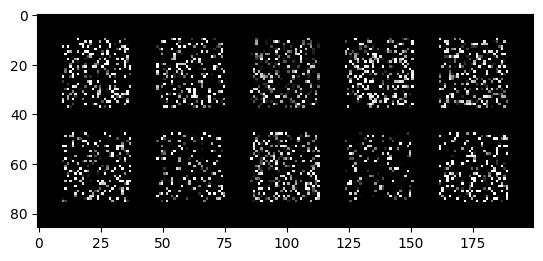

In [37]:
visualize_images(train_dataloader)

In [38]:
import matplotlib.pyplot as plt

Epoch 0: Train Loss=2.2400, Validation Loss=2.0955, Validation acc=47.8400
Epoch 1: Train Loss=1.7425, Validation Loss=1.3654, Validation acc=67.5000
Epoch 2: Train Loss=1.0827, Validation Loss=0.8850, Validation acc=74.6800
Epoch 3: Train Loss=0.7890, Validation Loss=0.7296, Validation acc=77.9900
Epoch 4: Train Loss=0.6773, Validation Loss=0.6543, Validation acc=80.1300
Epoch 5: Train Loss=0.6124, Validation Loss=0.6046, Validation acc=81.6800
Epoch 6: Train Loss=0.5674, Validation Loss=0.5689, Validation acc=82.7700
Epoch 7: Train Loss=0.5334, Validation Loss=0.5424, Validation acc=83.5600
Epoch 8: Train Loss=0.5063, Validation Loss=0.5205, Validation acc=84.1800
Epoch 9: Train Loss=0.4830, Validation Loss=0.5013, Validation acc=84.8700
Epoch 10: Train Loss=0.4619, Validation Loss=0.4849, Validation acc=85.3000
Epoch 11: Train Loss=0.4428, Validation Loss=0.4685, Validation acc=85.8400
Epoch 12: Train Loss=0.4245, Validation Loss=0.4559, Validation acc=86.3200
Epoch 13: Train Loss=0

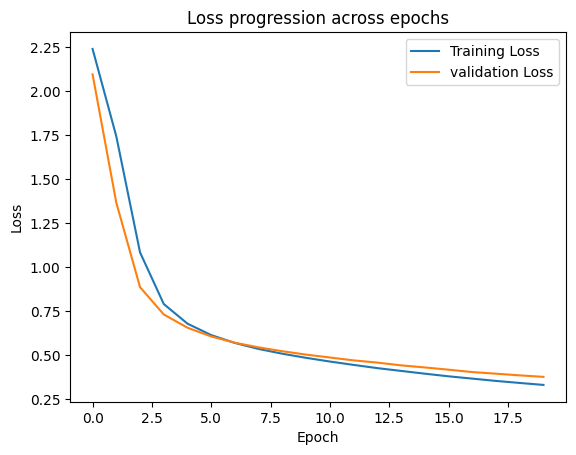

In [39]:
# initialize the model
MLP_SGD_nest= Net().to(DEVICE)

optimizer = optim.SGD(MLP_SGD_nest.parameters(), lr=0.01, momentum=0.9, nesterov=True)

train_losses, valid_losses, valid_accs = fit(
    model=MLP_SGD_nest,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=MLP_SGD_nest, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=2.2994, Validation Loss=2.2942, Validation acc=12.7700
Epoch 1: Train Loss=2.2880, Validation Loss=2.2803, Validation acc=17.9400
Epoch 2: Train Loss=2.2666, Validation Loss=2.2474, Validation acc=23.7800
Epoch 3: Train Loss=2.2072, Validation Loss=2.1514, Validation acc=30.6800
Epoch 4: Train Loss=2.0437, Validation Loss=1.9403, Validation acc=37.0700
Epoch 5: Train Loss=1.7551, Validation Loss=1.5477, Validation acc=49.7500
Epoch 6: Train Loss=1.3862, Validation Loss=1.2582, Validation acc=60.6700
Epoch 7: Train Loss=1.1687, Validation Loss=1.1190, Validation acc=63.6100
Epoch 8: Train Loss=1.0162, Validation Loss=0.9777, Validation acc=68.6900
Epoch 9: Train Loss=0.8979, Validation Loss=0.8522, Validation acc=73.3700
Epoch 10: Train Loss=0.8087, Validation Loss=0.7884, Validation acc=75.2200
Epoch 11: Train Loss=0.7338, Validation Loss=0.7414, Validation acc=76.2100
Epoch 12: Train Loss=0.6849, Validation Loss=0.6829, Validation acc=78.5800
Epoch 13: Train Loss=0

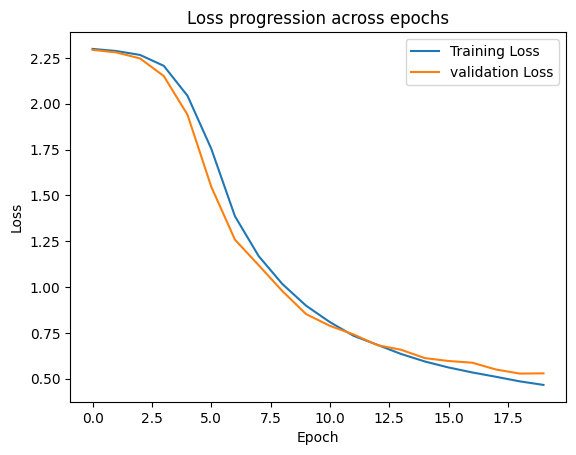

In [40]:
# initialize model
CNN_SGD_nest = CNN().to(DEVICE)

# define the optimizer
optimizer = optim.SGD(CNN_SGD_nest.parameters(), lr=0.01,momentum=0.9, nesterov=True)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=CNN_SGD_nest,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=CNN_SGD_nest, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Here, i tested the model trained on randomly permuted pixels images and tested it with original images to test how good our models would perform. Indeed, as expected the models dont perform that well and the CNN model is more affected (9% accuracy) than the MLP model (7% accuracy)

In [41]:
test_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=False,
    download=True,
    transform=transform_perm)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)


In [42]:
predict(model=MLP_SGD_nest, test_dataloader=test_dataloader, device=DEVICE)

Test set: Avg. loss: 0.6851, Accuracy: 7874/10000 (79%)


(0.6850842529296876, tensor(78.7400, device='cuda:0'))

In [43]:
predict(model=CNN_SGD_nest, test_dataloader=test_dataloader, device=DEVICE)

Test set: Avg. loss: 0.9196, Accuracy: 7108/10000 (71%)


(0.9196394775390625, tensor(71.0800, device='cuda:0'))

After testing it with permuted tests sets. We notice that the distinct impact of pixel permutation on the performance of CNNs and MLPs can be attributed to the fundamental differences in how these architectures process image data. CNNs, designed to exploit spatial hierarchies in images, rely on convolutional filters that capture local patterns like edges and textures. This process assumes that nearby pixels are related, forming identifiable features. When pixels are randomly permuted, this spatial relationship is disrupted, greatly diminishing the CNN's ability to extract meaningful features, hence its reduced accuracy. In contrast, MLPs treat each pixel independently, without considering spatial relationships. This lack of spatial awareness makes MLPs more resilient to such permutations, as their processing methodology remains unaffected by the changed pixel positions. Consequently, the MLP shows a lesser decline in performance compared to the CNN, reflecting its relative robustness in this altered scenario. This outcome underscores the CNN's sensitivity to spatial structures in images, a key aspect of its design for image processing tasks, which is compromised when these structures are disrupted.

### 6) Bonus

In [44]:
class CNNwithBN(nn.Module):
    def __init__(self):
        super().__init__()

        # We use a Sequential, i.e. the inputs passes through each of
        # the modules below, one-by-one
        self.conv = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )

        # fully connected layer, output 10 classes
        self.out = nn.Linear(64*3*3, 10)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [48]:
train_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

# load the test dataset
test_dataset = torchvision.datasets.KMNIST(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

# Split the dataset into 50k-10k samples for training-validation.
from torch.utils.data import random_split
train_dataset,  valid_dataset = random_split(
    train_dataset,
    lengths=[50000, 10000],
    generator=torch.Generator().manual_seed(42) #use a generator to insure reproducibilty
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2)

valid_dataloader = DataLoader(
    dataset=valid_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

Epoch 0: Train Loss=0.6251, Validation Loss=0.3994, Validation acc=87.7800
Epoch 1: Train Loss=0.1834, Validation Loss=0.1687, Validation acc=95.1900
Epoch 2: Train Loss=0.1274, Validation Loss=0.1369, Validation acc=96.0700
Epoch 3: Train Loss=0.0991, Validation Loss=0.1233, Validation acc=96.4200
Epoch 4: Train Loss=0.0809, Validation Loss=0.1098, Validation acc=96.7500
Epoch 5: Train Loss=0.0671, Validation Loss=0.1026, Validation acc=97.0100
Epoch 6: Train Loss=0.0568, Validation Loss=0.0984, Validation acc=97.0400
Epoch 7: Train Loss=0.0483, Validation Loss=0.0939, Validation acc=97.2900
Epoch 8: Train Loss=0.0414, Validation Loss=0.0914, Validation acc=97.2300
Epoch 9: Train Loss=0.0361, Validation Loss=0.0917, Validation acc=97.2900
Epoch 10: Train Loss=0.0314, Validation Loss=0.0900, Validation acc=97.3900
Epoch 11: Train Loss=0.0271, Validation Loss=0.0885, Validation acc=97.5300
Epoch 12: Train Loss=0.0237, Validation Loss=0.0885, Validation acc=97.5500
Epoch 13: Train Loss=0

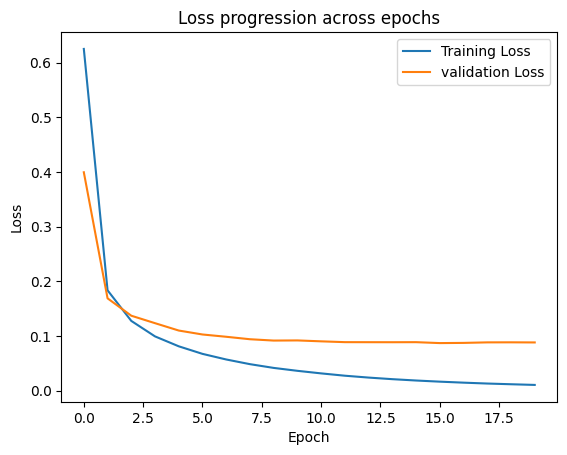

In [50]:
# initialize model
cnnBN = CNNwithBN().to(DEVICE)

# define the optimizer
optimizer = torch.optim.SGD(cnnBN.parameters(), lr=0.01, momentum=0.9)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=cnnBN,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=cnnBN, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

Epoch 0: Train Loss=0.6605, Validation Loss=0.2880, Validation acc=91.1200
Epoch 1: Train Loss=0.1175, Validation Loss=0.1079, Validation acc=96.6900
Epoch 2: Train Loss=0.0763, Validation Loss=0.0938, Validation acc=97.1200
Epoch 3: Train Loss=0.0560, Validation Loss=0.0870, Validation acc=97.4200
Epoch 4: Train Loss=0.0436, Validation Loss=0.0819, Validation acc=97.4700
Epoch 5: Train Loss=0.0344, Validation Loss=0.0801, Validation acc=97.6700
Epoch 6: Train Loss=0.0262, Validation Loss=0.0827, Validation acc=97.5500
Epoch 7: Train Loss=0.0205, Validation Loss=0.0733, Validation acc=97.9000
Epoch 8: Train Loss=0.0162, Validation Loss=0.0705, Validation acc=98.1300
Epoch 9: Train Loss=0.0125, Validation Loss=0.0734, Validation acc=98.0000
Epoch 10: Train Loss=0.0097, Validation Loss=0.0752, Validation acc=97.8100
Epoch 11: Train Loss=0.0075, Validation Loss=0.0730, Validation acc=98.0000
Epoch 12: Train Loss=0.0060, Validation Loss=0.0732, Validation acc=98.0000
Epoch 13: Train Loss=0

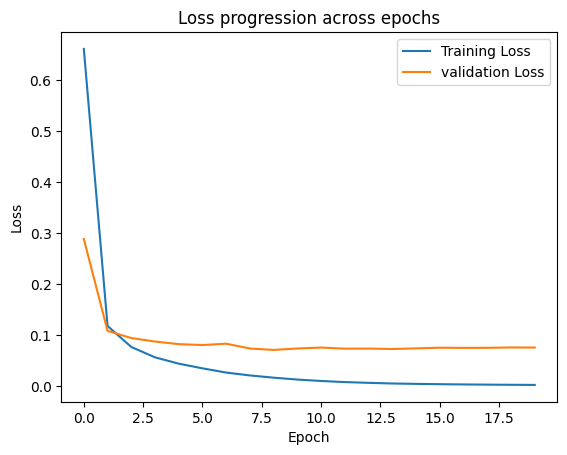

In [51]:
# initialize model
cnnBN = CNNwithBN().to(DEVICE)

# define the optimizer
optimizer = torch.optim.SGD(cnnBN.parameters(), lr=0.05, momentum=0.9)

# train the CNN
train_losses, valid_losses, valid_accs = fit(
    model=cnnBN,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    epochs=20,
    device=DEVICE
)

predict(model=cnnBN, test_dataloader=test_dataloader, device=DEVICE)

plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Loss progression across epochs")
plt.legend()

The integration of batch normalization into the CNN architecture significantly enhanced its performance on the original datasets, achieving a notable accuracy increase from 89% to 93% compared to the model without batch normalization. This improvement can be attributed to the normalization effect of batch normalization, which standardizes layer inputs, thereby reducing internal covariate shift and facilitating faster and more stable training. Moreover, batch normalization's capacity to stabilize the learning process allowed for an increase in the learning rate from 0.01 to 0.05. This higher learning rate, which would typically risk destabilizing the training in conventional settings, further improved the model's accuracy to 94%. This increase can be credited to the ability of batch normalization to handle larger updates effectively, improving gradient flow and reducing overfitting, thereby enhancing both the speed and quality of the network's training process. In summary, batch normalization not only boosted the model's accuracy significantly but also enabled the use of a higher learning rate, leading to even better performance.